# effect of health spending on residual life expectancy

In [30]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

path_data = Path("../data/united_kingdom")
path_results = Path("../analysis_results/united_kingdom")

pprint(list(path_data.iterdir()))

[PosixPath('../data/united_kingdom/uk_health_spending_billions_gbp.csv'),
 PosixPath('../data/united_kingdom/uk_demographics_wikipedia.csv'),
 PosixPath('../data/united_kingdom/who_uk_emographics_table_residual_life_expectancy.csv')]


In [2]:
from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution

## residual life expectancy over time

In [3]:
df_0 = pd.read_csv(path_data.joinpath('who_uk_emographics_table_residual_life_expectancy.csv'), index_col=0, header=[0, 1], skiprows=[2,], )
df_0.index = text_interval_index_to_interval_index(df_0.index, closed='both')
df_0.index.name = 'age_group'
df_0.columns.names = ['year', 'sex']
df_0.sort_index(axis=1, inplace=True)


In [4]:
dfs = df_0.swaplevel('year', 'sex', axis=1)
df = (dfs['Male'] + dfs['Female']) / 2

In [5]:
residual_life_expectancy = df.swapaxes(0, 1)
residual_life_expectancy.index = pd.to_numeric(residual_life_expectancy.index)

In [6]:
residual_life_expectancy

age_group  [1, 4]  [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  [30, 34]  \
year                                                                          
2000        77.25   73.35     68.40     63.45     58.60     53.70     48.85   
2001        77.55   73.60     68.65     63.70     58.85     54.00     49.15   
2002        77.70   73.75     68.80     63.85     58.95     54.15     49.30   
2003        77.80   73.90     68.90     63.95     59.05     54.25     49.40   
2004        78.30   74.40     69.40     64.45     59.55     54.70     49.90   
2005        78.45   74.55     69.60     64.60     59.75     54.90     50.05   
2006        78.85   74.95     69.95     65.00     60.10     55.25     50.40   
2007        79.10   75.15     70.20     65.25     60.35     55.45     50.60   
2008        79.20   75.30     70.35     65.40     60.45     55.60     50.75   
2009        79.75   75.80     70.85     65.90     61.00     56.10     51.25   
2010        79.90   75.95     71.00     66.05     61.10     56.25     51.40   
2011        80.35   76.40     71.45     66.45     61.55     56.70     51.75   
2012        80.45   76.45     71.50     66.55     61.60     56.70     51.85   
2013        80.50   76.50     71.60     66.60     61.70     56.75     51.90   
2014        80.70   76.75     71.80     66.80     61.90     57.05     52.10   
2015        80.40   76.45     71.45     66.55     61.60     56.70     51.85   
2016        80.70   76.75     71.80     66.80     61.90     57.00     52.15   

age_group  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  [60, 64]  \
year                                                                    
2000          44.10     39.25     34.60     30.05     25.55     21.35   
2001          44.35     39.60     34.85     30.30     25.85     21.60   
2002          44.45     39.70     35.00     30.45     25.95     21.75   
2003          44.55     39.80     35.10     30.50     26.10     21.80   
2004          45.05     40.30     35.55     31.00     26.50     22.20   
2005          45.20     40.45     35.70     31.10     26.65     22.35   
2006          45.60     40.80     36.10     31.50     27.05     22.75   
2007          45.80     41.05     36.30     31.70     27.25     22.95   
2008          45.95     41.20     36.45     31.85     27.40     23.10   
2009          46.40     41.65     36.95     32.30     27.85     23.55   
2010          46.55     41.80     37.05     32.45     27.90     23.60   
2011          46.95     42.15     37.45     32.85     28.30     23.95   
2012          47.00     42.15     37.50     32.85     28.30     23.95   
2013          47.05     42.30     37.55     32.90     28.40     24.00   
2014          47.30     42.50     37.75     33.15     28.60     24.25   
2015          47.00     42.15     37.50     32.85     28.30     23.95   
2016          47.30     42.45     37.75     33.10     28.55     24.25   

age_group  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
year                                                          
2000          17.35     13.75     10.50      7.85       5.65  
2001          17.60     13.95     10.75      8.00       5.75  
2002          17.70     14.05     10.80      8.05       5.80  
2003          17.80     14.10     10.85      8.00       5.75  
2004          18.20     14.50     11.20      8.35       6.00  
2005          18.30     14.50     11.15      8.25       5.90  
2006          18.70     14.90     11.45      8.55       6.10  
2007          18.90     15.10     11.60      8.65       6.20  
2008          19.00     15.15     11.70      8.70       6.20  
2009          19.40     15.55     12.05      8.95       6.40  
2010          19.45     15.60     12.05      8.95       6.35  
2011          19.85     15.95     12.35      9.20       6.55  
2012          19.75     15.90     12.30      9.10       6.50  
2013          19.85     15.95     12.35      9.20       6.55  
2014          20.10     16.15     12.55      9.35       6.65  
2015          19.80     15.85     12.20

In [7]:
residual_life_expectancy.mean(axis=1).plot()

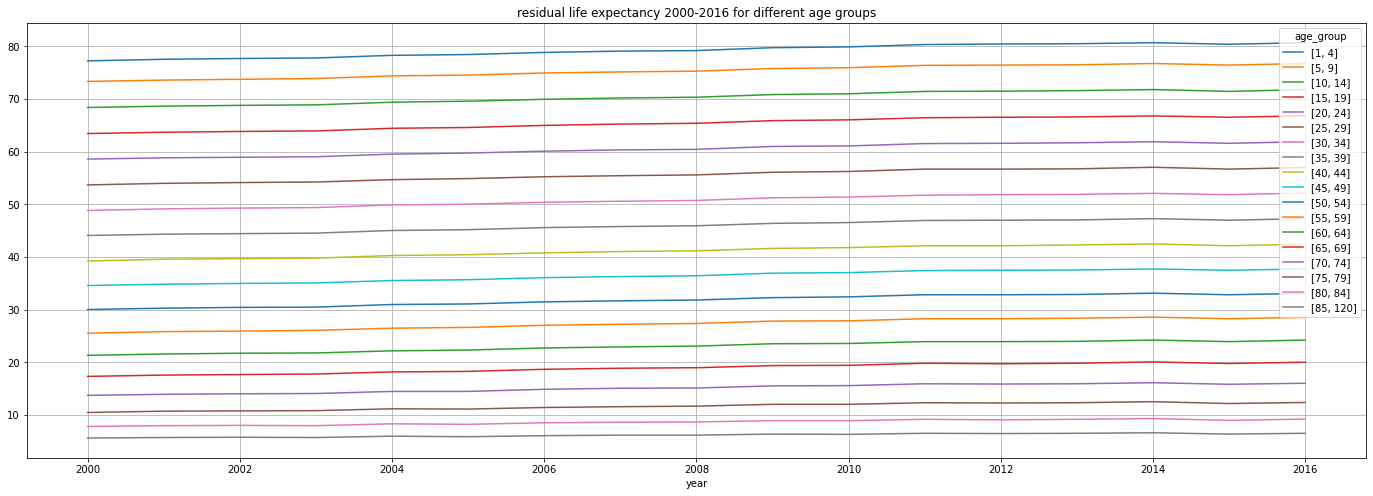

In [8]:
residual_life_expectancy.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='residual life expectancy 2000-2016 for different age groups')

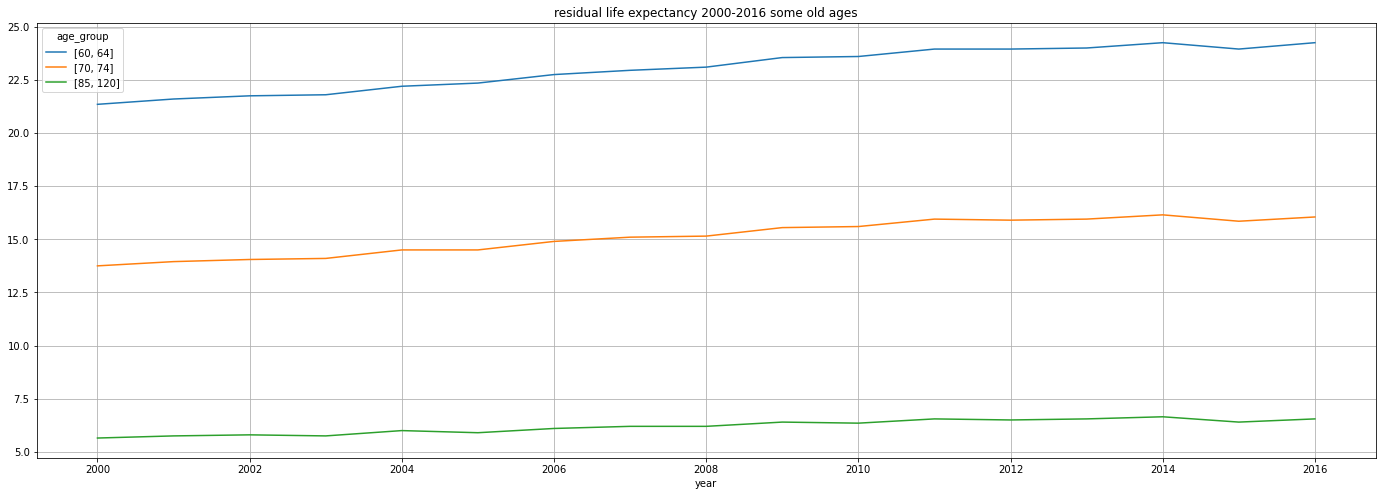

In [9]:
residual_life_expectancy.rename(columns=lambda x : str(x)).loc[:, ['[60, 64]', '[70, 74]', '[85, 120]']].plot(grid=True, title='residual life expectancy 2000-2016 some old ages', figsize=(24, 8))

In [10]:
residual_life_expectancy_diff = residual_life_expectancy.diff(axis=0)

Text(0, 0.5, 'delta[years]')

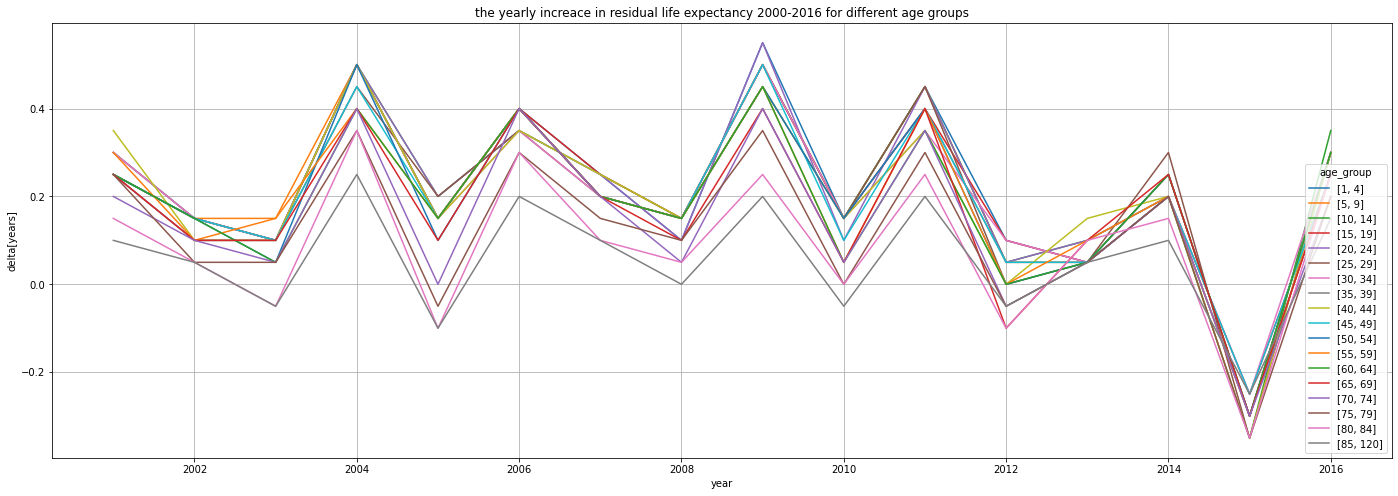

In [11]:
ax = residual_life_expectancy_diff.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='the yearly increace in residual life expectancy 2000-2016 for different age groups')
ax.set_ylabel('delta[years]')

### checking consistency of yearly increase

In [12]:
residual_life_expectancy_diff.describe().loc[['mean', 'std'], :]

age_group    [1, 4]    [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  \
mean       0.215625  0.212500  0.212500  0.209375  0.206250  0.206250   
std        0.207138  0.200416  0.206962  0.186386  0.205649  0.208066   

age_group  [30, 34]  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  \
mean        0.20625  0.200000  0.200000  0.196875  0.190625  0.187500   
std         0.18246  0.194936  0.200832  0.184814  0.198510  0.188414   

age_group  [60, 64]  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
mean       0.181250  0.168750  0.143750  0.118750    0.0875   0.056250  
std        0.189627  0.193972  0.190504  0.184278    0.1812   0.134009

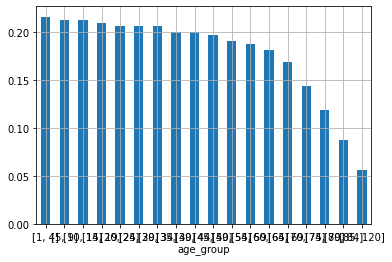

In [13]:
residual_life_expectancy_yearly_increace_by_age = residual_life_expectancy_diff.mean(axis=0)
residual_life_expectancy_yearly_increace_by_age.plot.bar(rot=0)

### conclusion: residual life expectancy increase yearly for all age groups. it's a little noisy, but consistent over the years

## life years lost due to degregation of one year

In [14]:
age_pyramid = pd.read_csv(path_data.joinpath('israel_2019_age_pyramid.csv'), index_col=0)
age_pyramid.index = text_interval_index_to_interval_index(age_pyramid.index, closed='both')
age_pyramid = age_pyramid.M + age_pyramid.F
age_pyramid = reduce_histogram_resolution(age_pyramid, residual_life_expectancy_yearly_increace_by_age.index)
age_pyramid.plot.bar(rot=0)

FileNotFoundError: [Errno 2] File ../data/united_kingdom/israel_2019_age_pyramid.csv does not exist: '../data/united_kingdom/israel_2019_age_pyramid.csv'

In [15]:
total_remaining_life_years_yearly_increace_by_age = residual_life_expectancy_yearly_increace_by_age * age_pyramid
total_remaining_life_years_yearly_increace_by_age.plot.bar(rot=0)

NameError: name 'age_pyramid' is not defined

In [16]:
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = total_remaining_life_years_yearly_increace_by_age / residual_life_expectancy.loc[2016, :]
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.plot.bar()

NameError: name 'total_remaining_life_years_yearly_increace_by_age' is not defined

In [17]:
residual_life_expectancy_yearly_increace_by_age.to_csv(path_results.joinpath('residual_life_expectancy_yearly_increace_by_age.csv'))
total_remaining_life_years_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_yearly_increace_by_age.csv'))
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'))

NameError: name 'total_remaining_life_years_yearly_increace_by_age' is not defined

In [18]:
#some pandas didn't work here nicely, dumped this cell \n
#yearly_increase_by_age_group = pd.concat(
#    [residual_life_expectancy_yearly_increace_by_age, total_remaining_life_years_yearly_increace_by_age, total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age],
#    axis=1
#)
#yearly_increase_by_age_group.columns = ['residual_life_expectancy', 'total_remaining_life_years_2016', 'total_remaining_life_years_life_equivalent_2016']
#yearly_increase_by_age_group.to_csv(path_results.joinpath('yearly_increase_by_age_group.csv'))
#yearly_increase_by_age_group

## health spending in UK over time

In [19]:
df_health_expenditure = pd.read_csv(path_data.joinpath('uk_health_spending_billions_gbp.csv'), index_col=0, usecols=[0, 2])


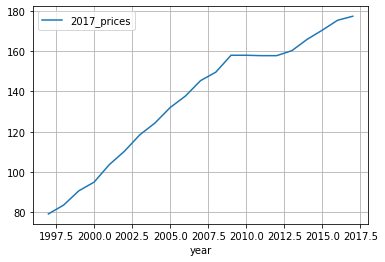

In [20]:
df_health_expenditure.plot()

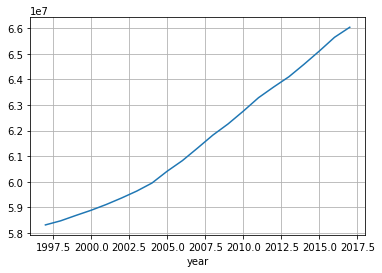

In [21]:
population = pd.read_csv(path_data.joinpath('uk_demographics_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)
population = population.loc[df_health_expenditure.index]
population.plot()

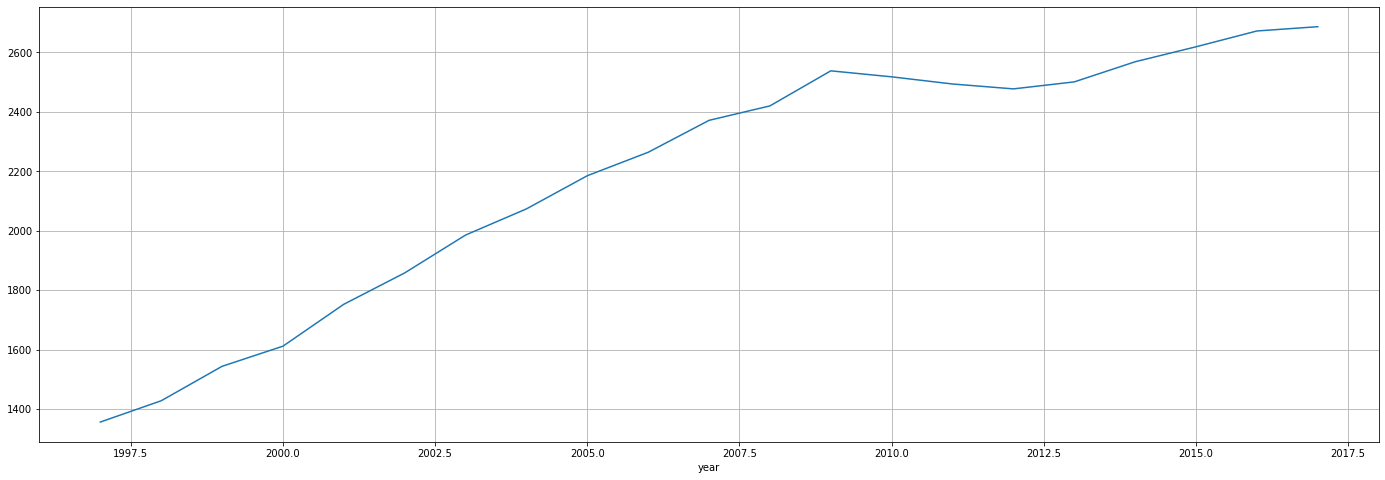

In [22]:
df_health_expenditure['gbp_per_capita'] = df_health_expenditure['2017_prices']  * 10 ** 9 / (population)
#df_health_expenditure.dropna()
df_health_expenditure['gbp_per_capita'].plot(grid=True, figsize=(24, 8))


In [23]:
pd.concat([df_health_expenditure['gbp_per_capita'], residual_life_expectancy.mean(axis=1)], axis=1).columns.names

FrozenList([None])

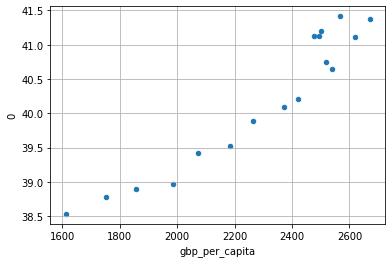

In [24]:
pd.concat([df_health_expenditure['gbp_per_capita'], residual_life_expectancy.mean(axis=1)], axis=1).plot.scatter(x='gbp_per_capita', y=0)

# This is the main part
# ===================================

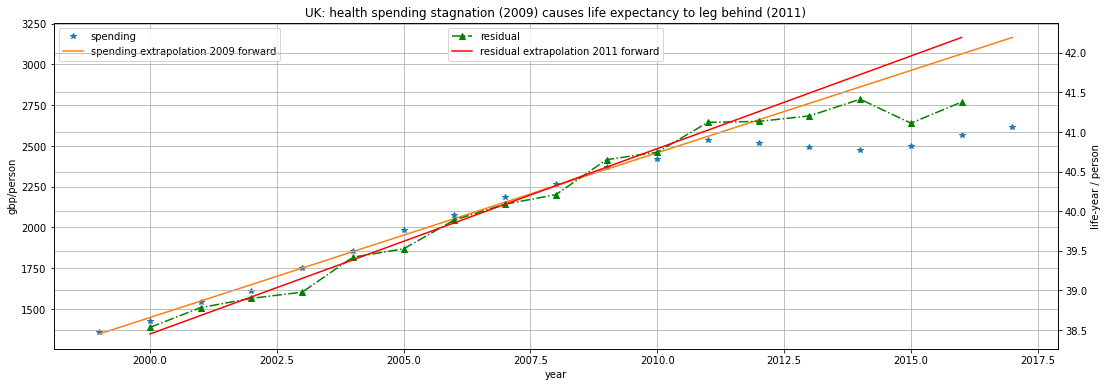

In [73]:
spending = df_health_expenditure['gbp_per_capita'].shift(2).dropna()
spending_early = spending.loc[:2011]
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(spending_early.index.values.reshape(-1, 1), spending_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
ax = spending.plot(label='spending', linestyle=' ', marker="*")
ax.plot(spending.index, linear_regressor.predict(spending.index.values.reshape(-1, 1)), label='spending extrapolation 2009 forward')
ax.set_ylabel('gbp/person')

ax2 = ax.twinx()

res = residual_life_expectancy.mean(axis=1)
res_early = res.loc[:2011]

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='residual', linestyle='-.', marker='^')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', label='residual extrapolation 2011 forward')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('life-year / person')

ax.set_title('UK: health spending stagnation (2009) causes life expectancy to leg behind (2011)')

fig = ax.get_figure()
fig.savefig(path_results.joinpath('uk_spending_residual_extrapolation.jpeg'))

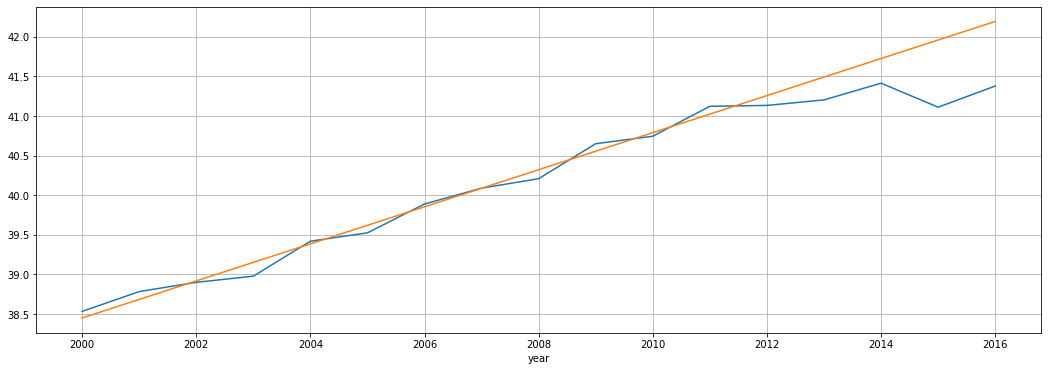

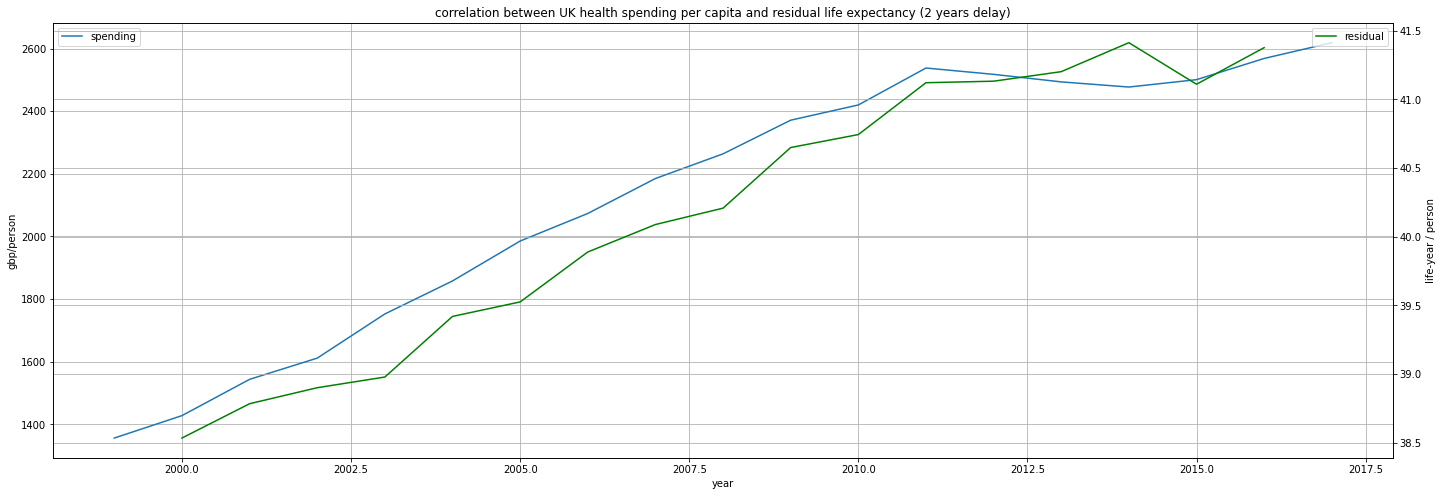

In [26]:
ax = df_health_expenditure['gbp_per_capita'].shift(2).plot(grid=True, figsize=(24, 8), label='spending')
ax.set_ylabel('gbp/person')
ax2 = ax.twinx()
ax.set_title('correlation between UK health spending per capita and residual life expectancy (2 years delay)')
(residual_life_expectancy.mean(axis=1).shift(0)).plot(ax=ax2, label='residual', color='green')
ax.legend(loc='best')
ax2.set_ylabel('life-year / person')
ax2.legend(loc='best')
fig = ax.get_figure()
fig.savefig(path_results.joinpath('uk_spending_residual.jpeg'))

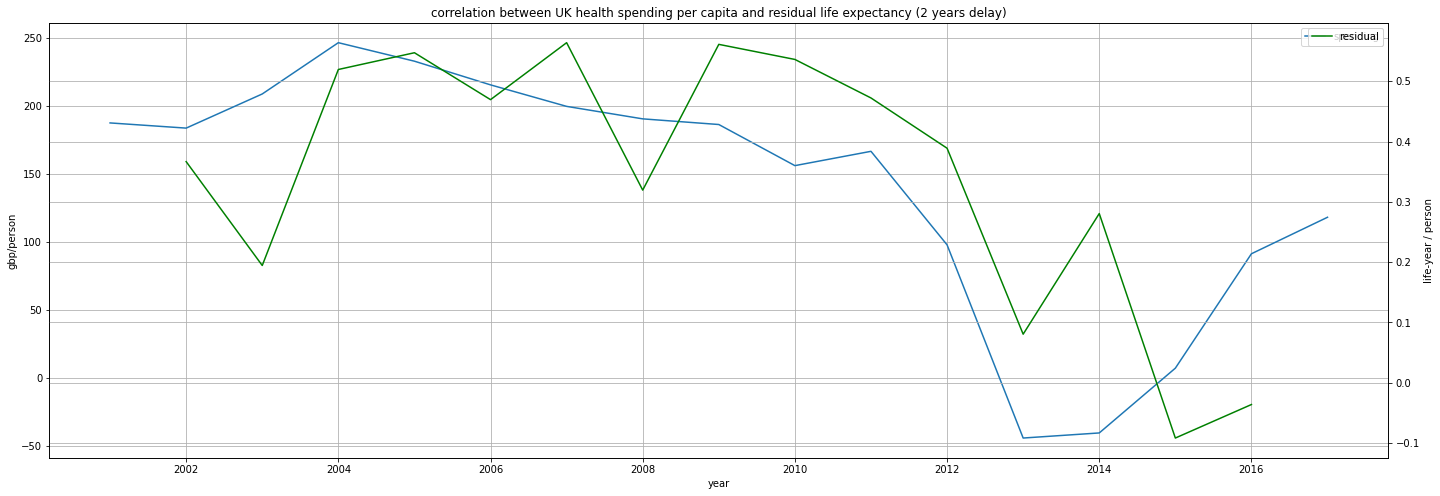

In [39]:
ax = df_health_expenditure['gbp_per_capita'].diff(periods=2).shift(2).plot(grid=True, figsize=(24, 8), label='spending')
ax.set_ylabel('gbp/person')
ax2 = ax.twinx()
ax.set_title('correlation between UK health spending per capita and residual life expectancy (2 years delay)')
(residual_life_expectancy.mean(axis=1).diff(periods=2).shift(0)).plot(ax=ax2, label='residual', color='green')
ax.legend(loc='best')
ax2.set_ylabel('life-year / person')
ax2.legend(loc='best')
fig = ax.get_figure()
#fig.savefig(path_results.joinpath('uk_spending_residual.jpeg'))

### difference between health expenditures per capita between adjecent years

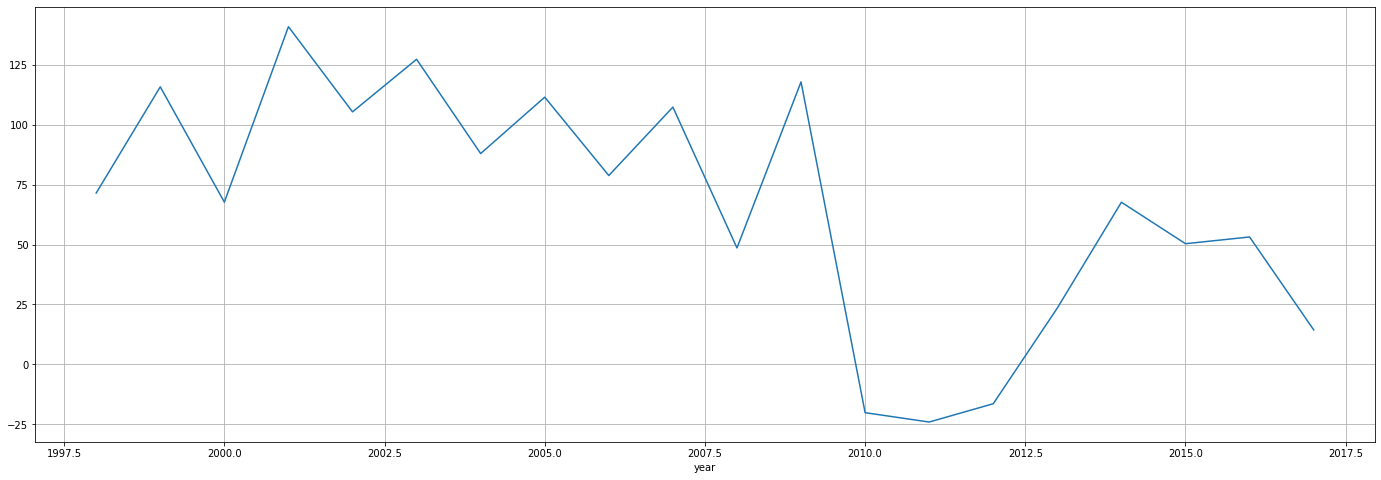

In [26]:
df_health_expenditure['gbp_per_capita'].diff().plot(grid=True, figsize=(24, 8))
#health_spending_per_capita_yearly_increase = df_health_expenditure.nis_per_capita.diff().median()


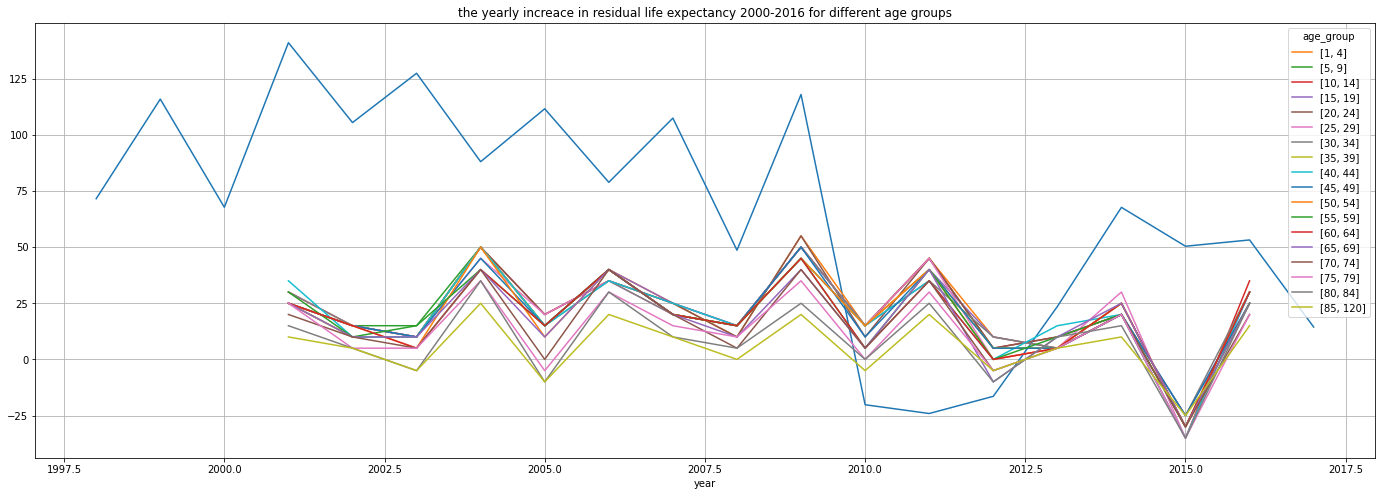

In [27]:
ax = df_health_expenditure['gbp_per_capita'].diff().plot(grid=True, figsize=(24, 8))
(100 * residual_life_expectancy_diff.rename(columns=lambda x:  str(x))).plot(grid=True, figsize=(24, 8), ax=ax, title='the yearly increace in residual life expectancy 2000-2016 for different age groups')


In [28]:
ax = df_health_expenditure.nis_per_capita.diff().plot.hist(grid=True, figsize=(24, 8))
ax.axvline(health_spending_per_capita_yearly_increase, color='red', label=f'median: {health_spending_per_capita_yearly_increase}', linewidth=6)
ax.legend(loc='best')

AttributeError: 'DataFrame' object has no attribute 'nis_per_capita'

### conclusion: 

In [29]:
print(f"every year the israeli health spending per capita increases ~{health_spending_per_capita_yearly_increase} NIS")

NameError: name 'health_spending_per_capita_yearly_increase' is not defined

In [24]:
dict_file = {'health_spending_per_capita_yearly_increase' : float(health_spending_per_capita_yearly_increase)}
with open(path_results.joinpath('health_spending_per_capita_yearly_increase.yaml'), 'w') as file:
    documents = yaml.dump(dict_file, file)